In [73]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [74]:
data = pd.read_csv('./meta.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2012-05-18,42.05,45.00,38.00,38.2318,573576400
1,2012-05-21,36.53,36.66,33.00,34.0300,168192700
2,2012-05-22,32.61,33.59,30.94,31.0000,101786600
3,2012-05-23,31.37,32.50,31.36,32.0000,73600000
4,2012-05-24,32.95,33.21,31.77,33.0300,50237200


In [75]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date   Open   High    Low    Close     Volume
0  2012-05-18  42.05  45.00  38.00  38.2318  573576400
1  2012-05-21  36.53  36.66  33.00  34.0300  168192700
2  2012-05-22  32.61  33.59  30.94  31.0000  101786600
3  2012-05-23  31.37  32.50  31.36  32.0000   73600000
4  2012-05-24  32.95  33.21  31.77  33.0300   50237200


In [76]:
# Calculate moving average
ma_day = [5, 10, 20, 50]  # Common short-term and long-term windows
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(window=ma).mean()

# Calculate Exponential moving average
for ma in ma_day:
    column_name = f"EMA for {ma} days"
    data[column_name] = data['Close'].ewm(span=ma, adjust=False).mean()

# Volatility (Standard Deviation): Capture price fluctuations:
# for ma in ma_day:
#     column_name = f"Volatility_{ma}d"
#     data[column_name] = data['Close'].rolling(window=ma).std()

# Calculate RSI
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = compute_RSI(data)

# # Trading Volume Moving Average: Add moving averages for the Volume
# for ma in ma_day:
#     data[f"Volume_MA_{ma}"] = data['Volume'].rolling(window=ma).mean()



            Date    Open     High       Low     Close     Volume  \
0     2012-05-18   42.05   45.000   38.0000   38.2318  573576400   
1     2012-05-21   36.53   36.660   33.0000   34.0300  168192700   
2     2012-05-22   32.61   33.590   30.9400   31.0000  101786600   
3     2012-05-23   31.37   32.500   31.3600   32.0000   73600000   
4     2012-05-24   32.95   33.210   31.7700   33.0300   50237200   
...          ...     ...      ...       ...       ...        ...   
2668  2022-12-23  116.03  118.175  115.5350  118.0400   17796625   
2669  2022-12-27  117.93  118.600  116.0501  116.8800   21392311   
2670  2022-12-28  116.25  118.150  115.5100  115.6200   19612473   
2671  2022-12-29  116.40  121.030  115.7700  120.2600   22366192   
2672  2022-12-30  118.16  120.420  117.7400  120.3400   19583825   

      MA for 5 days  MA for 10 days  MA for 20 days  MA for 50 days  \
0               NaN             NaN             NaN             NaN   
1               NaN             NaN      

,count,mean,std,min,25%,50%,75%,max
Open,2673.0,1.479633e+02,8.696828e+01,1.808000e+01,7.780000e+01,1.422600e+02,1.913600e+02,3.816800e+02
High,2673.0,1.498468e+02,8.805465e+01,1.827000e+01,7.853000e+01,1.445600e+02,1.940300e+02,3.843300e+02
Low,2673.0,1.460862e+02,8.591529e+01,1.755000e+01,7.705000e+01,1.408700e+02,1.884700e+02,3.788100e+02
Close,2673.0,1.479917e+02,8.699929e+01,1.772900e+01,7.783000e+01,1.422800e+02,1.912900e+02,3.821800e+02
Volume,2673.0,3.115405e+07,2.721709e+07,5.913066e+06,1.618928e+07,2.313342e+07,3.599420e+07,5.735764e+08
MA for 5 days,2669.0,1.480981e+02,8.692966e+01,1.846140e+01,7.780600e+01,1.422620e+02,1.913780e+02,3.790300e+02
MA for 10 days,2664.0,1.482359e+02,8.686269e+01,1.877955e+01,7.777912e+01,1.418685e+02,1.917312e+02,3.786580e+02
MA for 20 days,2654.0,1.485193e+02,8.673551e+01,1.925918e+01,7.751544e+01,1.434165e+02,1.920813e+02,3.734220e+02
MA for 50 days,2624.0,1.493997e+02,8.630554e+01,2.017572e+01,7.745560e+01,1.471485e+02,1.906790e+02,3.637544e+02
EMA for 5 days,2673.0,1.479314e+02,8.694024e+01,1.846579e+01,7.757111e+01,1.420655e+02,1.913073e+02,3.782458e+02


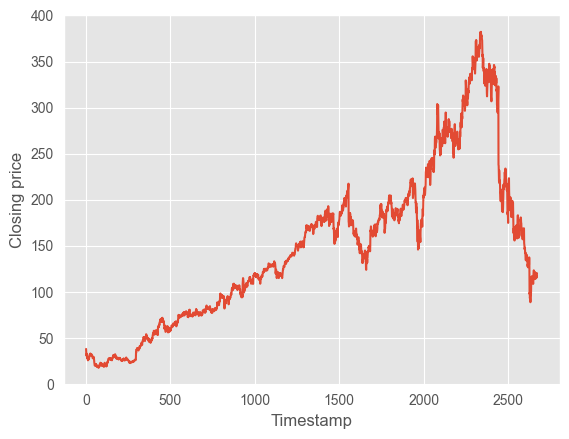

In [77]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [78]:
data.dropna(inplace=True)
data.head(500)

,Date,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14
49,2012-07-30,23.995,24.04,23.030,23.15,29285900,26.29800,27.52000,29.237800,29.838636,25.546291,27.046144,28.449746,30.538853,15.733114
50,2012-07-31,23.370,23.37,21.610,21.71,56179400,24.95000,26.88200,28.784750,29.508200,24.267527,26.075936,27.807865,30.192623,14.602446
51,2012-08-01,21.500,21.58,20.840,20.88,44604400,23.25800,26.05900,28.268750,29.245200,23.138351,25.131220,27.148068,29.827422,13.890909
52,2012-08-02,20.770,20.84,19.820,20.04,56374500,21.89700,25.16300,27.697250,29.026000,22.105568,24.205544,26.471110,29.443602,13.172414
53,2012-08-03,20.360,22.16,19.900,21.09,80647000,21.37400,24.39600,27.165250,28.807800,21.767045,23.639081,25.958623,29.116010,22.638623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2014-07-21,68.810,69.96,68.500,69.40,49431600,67.81096,66.58973,66.626865,64.001716,68.007206,67.283914,66.478537,64.769416,56.251778
545,2014-07-22,69.760,69.77,68.610,69.27,40301800,68.23196,67.24073,66.821865,64.242316,68.428138,67.645020,66.744391,64.945909,53.726471
546,2014-07-23,69.740,71.33,69.610,71.29,77435900,68.95796,67.87273,67.100365,64.471516,69.382092,68.307744,67.177306,65.194697,64.538726
547,2014-07-24,75.960,76.74,74.510,74.98,124006900,70.67198,68.88348,67.477365,64.774516,71.248061,69.520881,67.920420,65.578435,71.536342


In [79]:
# updated Code
# I USED THIS CODE
from sklearn.model_selection import train_test_split
import numpy as np

X = []
Y = []
window_size = 100

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, 4]  # Normalize using "Close" price
    temp = []
    temp2 = []
    for j in range(window_size):
        # Normalize "Close" and include RSI_14 as a second feature
        normalized_close = (df.iloc[i + j, 4] - first_close) / first_close
        rsi_14 = df.iloc[i + j, -1]  # Assuming RSI_14 is the last column
        temp.append([normalized_close, rsi_14])  # Add both features as a pair
    temp2.append((df.iloc[i + window_size, 4] - first_close) / first_close)  # Use "Close" for target
    X.append(np.array(temp))  # Each sample has shape (100, 2)
    Y.append(np.array(temp2).reshape(1, 1))

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Converting lists to numpy arrays
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

# Reshaping the data for CNN models
train_X = train_X.reshape(train_X.shape[0], 1, 100, 2)  # Adding 2 for two features
test_X = test_X.reshape(test_X.shape[0], 1, 100, 2)

# Printing the number of training and testing samples
print(len(train_X))
print(len(test_X))

2017
505


In [80]:
# Check if there are any NaN values

print(np.isnan(train_X).any(), np.isnan(train_Y).any())
print(np.isinf(train_X).any(), np.isinf(train_Y).any())

False False
False False


In [81]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Create the model
model = tf.keras.Sequential()

# Enhanced CNN layers with BatchNormalization and LeakyReLU
model.add(TimeDistributed(Conv1D(64, kernel_size=3, padding='same', 
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                               input_shape=(None, 100, 1))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Conv1D(128, kernel_size=3, padding='same',
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Conv1D(64, kernel_size=3, padding='same',
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Flatten()))

# Enhanced LSTM layers (removed clip_norm parameter)
model.add(Bidirectional(LSTM(128, return_sequences=True, 
                            kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                            recurrent_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Bidirectional(LSTM(64, return_sequences=False,
                            kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                            recurrent_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Dense layers with regularization
model.add(Dense(32, kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

# Optimizer with gradient clipping (clipnorm moved here)
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

model.compile(optimizer=optimizer,
             loss='mse',
             metrics=['mse', 'mae'])

# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )
]

# Train the model
history = model.fit(
    train_X, 
    train_Y,
    validation_data=(test_X, test_Y),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1,
    shuffle=True
)

Epoch 1/100


c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - loss: 1.3986 - mae: 0.6857 - mse: 0.7953 - val_loss: 0.5195 - val_mae: 0.1593 - val_mse: 0.0527 - learning_rate: 0.0010
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.7998 - mae: 0.4579 - mse: 0.3415 - val_loss: 0.4992 - val_mae: 0.1597 - val_mse: 0.0510 - learning_rate: 0.0010
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.6565 - mae: 0.3608 - mse: 0.2096 - val_loss: 0.4886 - val_mae: 0.1530 - val_mse: 0.0461 - learning_rate: 0.0010
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.6131 - mae: 0.3246 - mse: 0.1725 - val_loss: 0.4648 - val_mae: 0.1230 - val_mse: 0.0307 - learning_rate: 0.0010
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.5410 - mae: 0.2589 - mse: 0.1097 - val_loss: 0.4448 - val_mae: 0.1078 - val_mse: 0.0220 - learning_rate: 0.0010
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.5060 - mae: 0.2318 - mse: 0.0864 - val_loss: 0.4326 - val_mae: 0.1141 - val_mse

Training Loss: [1.1751844882965088, 0.754496157169342, 0.6401479244232178, 0.5920156836509705, 0.5322579741477966, 0.5003696084022522, 0.47381216287612915, 0.44398799538612366, 0.42146065831184387, 0.3994562029838562, 0.37936341762542725, 0.35775047540664673, 0.3404562175273895, 0.3243671953678131, 0.30686426162719727, 0.292516827583313, 0.2747868597507477, 0.2610184848308563, 0.24675092101097107, 0.23231513798236847, 0.21992188692092896, 0.207992285490036, 0.19589002430438995, 0.18440666794776917, 0.1735745668411255, 0.1639292687177658, 0.1548025906085968, 0.14449231326580048, 0.13585761189460754, 0.12708748877048492, 0.12134508788585663, 0.11478152871131897, 0.10830613970756531, 0.10068519413471222, 0.09510982781648636, 0.0914015844464302, 0.08554494380950928, 0.08037769794464111, 0.07529229670763016, 0.07136649638414383, 0.06715260446071625, 0.0629967525601387, 0.05961908772587776, 0.05632472038269043, 0.05481290817260742, 0.05228511244058609, 0.05131839960813522, 0.0509743914008140

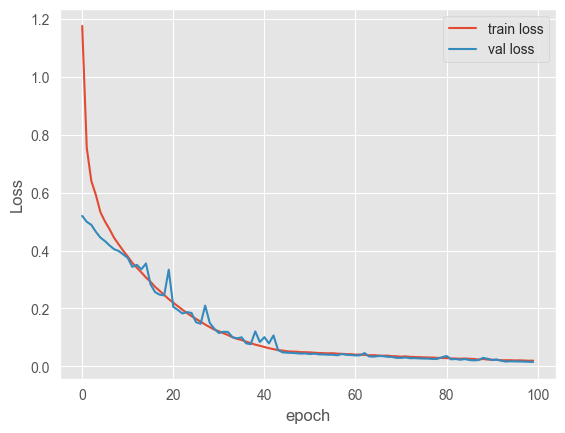

In [82]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

print("Training Loss:", history.history.get('loss', []))
print("Validation Loss:", history.history.get('val_loss', []))




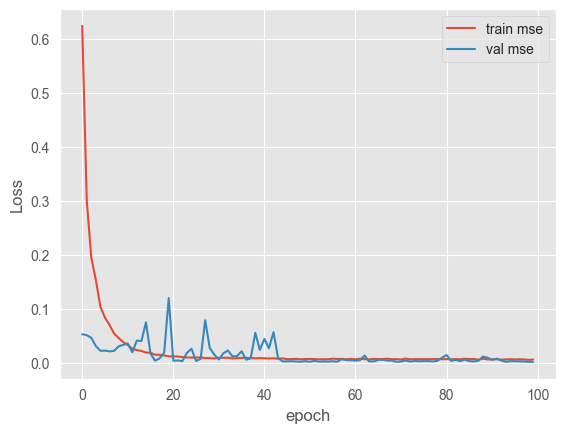

In [83]:
# mse
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()



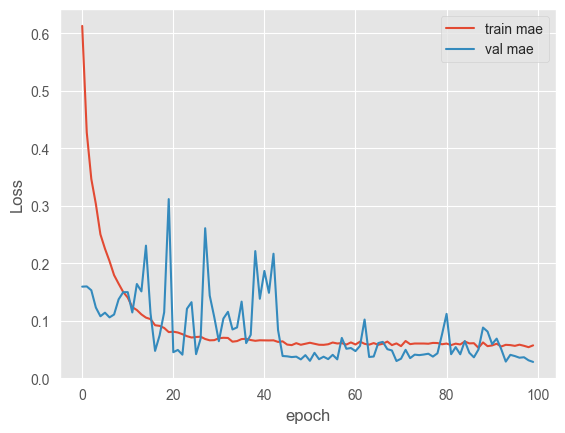

In [84]:
# mae
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [85]:
model.evaluate(test_X, test_Y)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0157 - mae: 0.0285 - mse: 0.0015


[0.015622308477759361, 0.0013898031320422888, 0.028439225628972054]

In [86]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.977852
R2 Score: 0.977852
Max Error: 0.160532


In [87]:
# make predictions
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp


# # Get predictions from the model
# predicted = model.predict(test_X)

# # Reshape the actual test labels and predictions to ensure proper shape
# test_label = test_Y.reshape(-1,1)
# predicted = np.array(predicted[:,0]).reshape(-1,1)

# # Get the length of training data
# len_t = len(train_X)

# # Inverse transform the predictions and actual values
# # This loop is denormalizing/inverse scaling the predictions and actual values
# for j in range(len_t, len_t + len(test_X)):
#     temp = data.iloc[j,3]  # Getting the original scale factor
#     # Inverse transform actual values
#     test_label[j - len_t] = test_label[j - len_t] * temp + temp
#     # Inverse transform predictions
#     predicted[j - len_t] = predicted[j - len_t] * temp + temp


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [88]:
def plot_predictions(test_label, predicted, title="Stock Price Prediction"):
    # Create figure and axis with specified size
    plt.figure(figsize=(15, 7))
    
    # Plot actual prices
    plt.plot(test_label, label='Actual Price', color='green')
    
    # Plot predicted prices
    plt.plot(predicted, label='Predicted Price', color='red')
    
    # Customize the plot
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add margins for better visibility
    plt.margins(x=0.02)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show plot
    plt.show()

def plot_predictions_with_dates(test_label, predicted, dates, title="Stock Price Prediction"):
    plt.figure(figsize=(15, 6))
    
    # Plot with dates
    plt.plot(dates, test_label, label='Actual Price', color='blue', linewidth=2)
    plt.plot(dates, predicted, label='Predicted Price', color='red', linestyle='--', linewidth=2)
    
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Format date axis
    plt.gcf().autofmt_xdate()  # Angle and align the tick labels
    
    plt.tight_layout()
    plt.show()

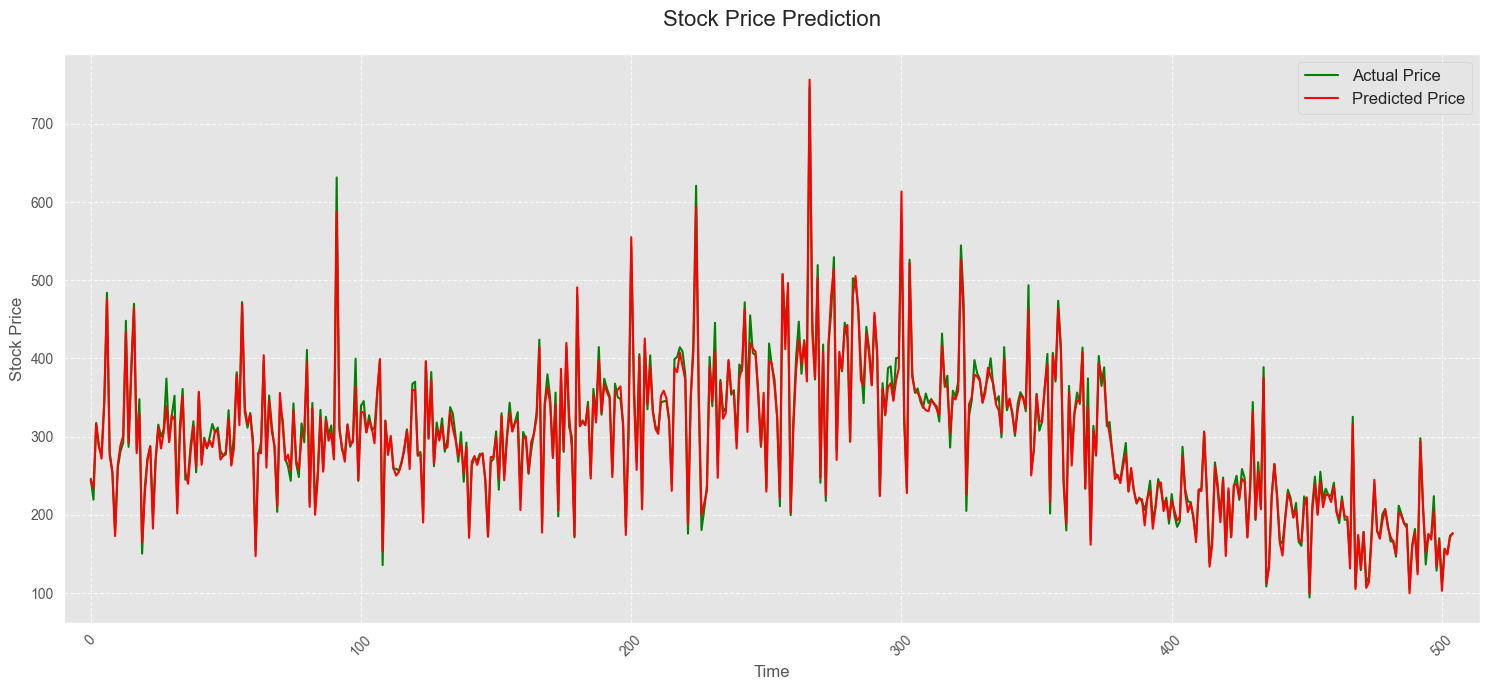

In [89]:
plot_predictions(test_label, predicted, "Stock Price Prediction")

Data shape: 2624
Test label shape: (505, 1)
Predicted shape: (505, 1)


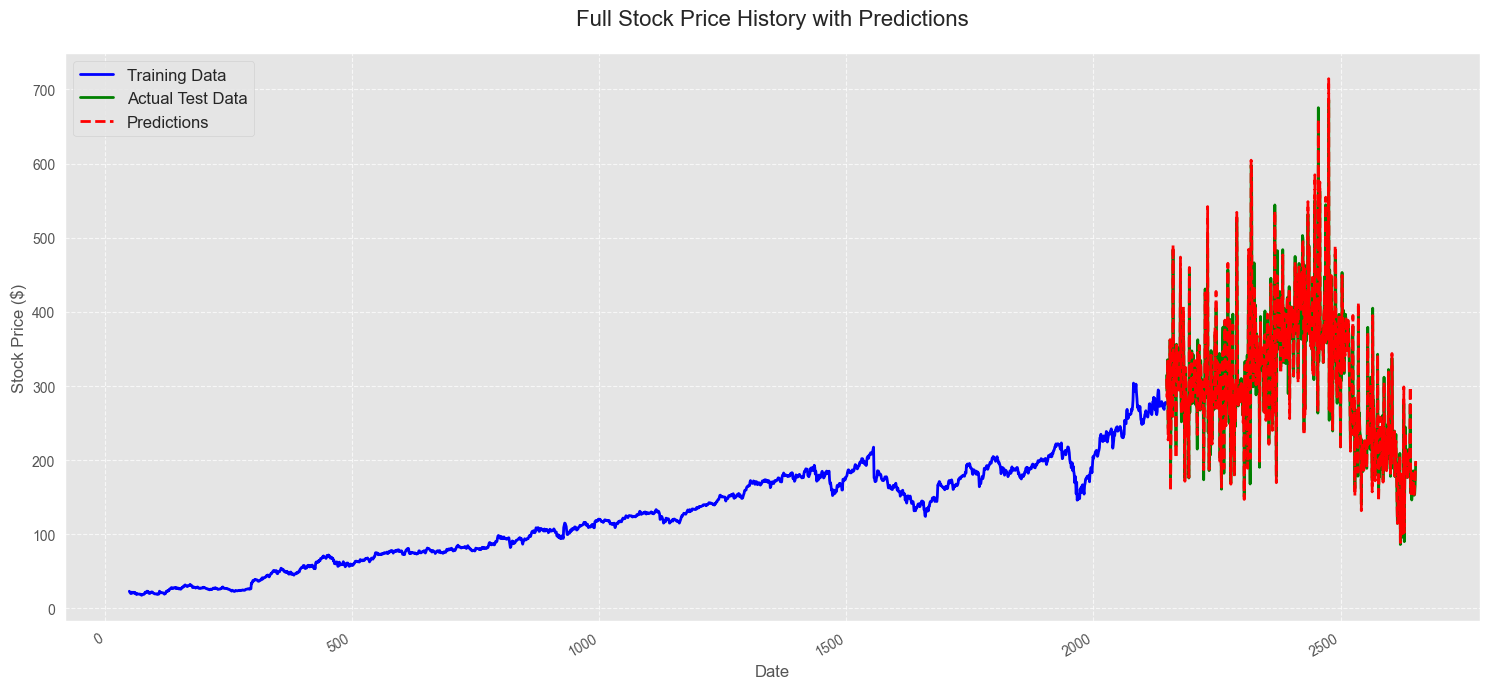

Training period: 49 to 2147
Testing period: 2148 to 2672


In [59]:
# def plot_full_history(data, test_label, predicted, title="Stock Price History"):
#     plt.figure(figsize=(15, 7))
    
#     # Calculate the train/test split point
#     split_idx = int(len(data) * 0.8)
    
#     # Plot training data
#     plt.plot(data.index[:split_idx], data['Close'][:split_idx], 
#              label='Training Data', color='blue', linewidth=2)
    
#     # Get the correct indices for test period
#     test_indices = data.index[split_idx:split_idx + len(test_label)]
    
#     # Reshape test_label and predicted if they're 2D
#     test_label = test_label.reshape(-1)
#     predicted = predicted.reshape(-1)
    
#     # Plot test period
#     plt.plot(test_indices, test_label, 
#              label='Actual Test Data', color='green', linewidth=2)
#     plt.plot(test_indices, predicted, 
#              label='Predictions', color='red', linestyle='--', linewidth=2)
    
#     plt.title(title, fontsize=16, pad=20)
#     plt.xlabel('Date', fontsize=12)
#     plt.ylabel('Stock Price ($)', fontsize=12)
#     plt.legend(loc='best', fontsize=12)
#     plt.grid(True, linestyle='--', alpha=0.7)
    
#     # Format date axis
#     plt.gcf().autofmt_xdate()
    
#     plt.tight_layout()
#     plt.show()

# # Print shapes to verify
# print(f"Data shape: {len(data)}")
# print(f"Test label shape: {test_label.shape}")
# print(f"Predicted shape: {predicted.shape}")

# # Plot entire history including training data and predictions
# plot_full_history(data, test_label, predicted, "Full Stock Price History with Predictions")

# # To print the date ranges:
# print(f"Training period: {data.index[0]} to {data.index[int(len(data)*0.8)-1]}")
# print(f"Testing period: {data.index[int(len(data)*0.8)]} to {data.index[-1]}")

In [90]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate performance metrics
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_label, predicted)
mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 110.01276325240671
Root Mean Squared Error (RMSE): 10.488696928236925
Mean Absolute Error (MAE): 7.818962387822778
Mean Absolute Percentage Error (MAPE): 2.66%


In [82]:
# Save the trained model
model.save('improved_model.h5')  # Saves the entire model (architecture, weights, and optimizer state)
